<a href="https://colab.research.google.com/github/acekanth/hello-world/blob/master/AutoTS_Billing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install auto_ts

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv
import pandas as pd
import numpy as np

In [3]:
import auto_ts as AT

Imported auto_timeseries version:0.0.36. Call by using:
model = auto_timeseries(score_type='rmse',
                time_interval='M',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['best'],
                verbose=2)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [4]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [5]:
def parse(x):
  return datetime.striptime(x, '%Y-%m')

In [6]:
billing_data = read_csv('/gdrive/My Drive/AIML/Budget_Billing-Pattern.csv',parse_dates={'time':['Year','Month']},)

In [7]:
billing_data

,time,BilledAmount
0,2015-01-01,1495573889
1,2015-02-01,2677319369
2,2015-03-01,3017270141
3,2015-04-01,3371122481
4,2015-05-01,3171867579
...,...,...
67,2020-08-01,5229801635
68,2020-09-01,4877444978
69,2020-10-01,1383242561
70,2020-11-01,5056037033


In [8]:
df_len = len(billing_data)
split_index = int(df_len*0.67)


In [9]:
train = billing_data[:split_index]
test =  billing_data[split_index:]

In [10]:
ts_column = 'time'
target = 'BilledAmount'

In [11]:
ml_dict = AT.auto_timeseries(score_type='rmse',time_interval='M',
                non_seasonal_pdq=None, seasonality=True, seasonal_period=12,
                model_type=['best'],
                verbose=2)

Start of Fit.....
Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Results of Augmented Dickey-Fuller Test:
+-----------------------------+------------------------------+
|                             | Dickey-Fuller Augmented Test |
+-----------------------------+------------------------------+
|        Test Statistic       |     -7.0719477050443444      |
|           p-value           |    4.911350778459484e-10     |
|          #Lags Used         |             1.0              |
| Number of Observations Used |             70.0             |
|     Critical Value (1%)     |     -3.5274258688046647      |
|     Critical Value (5%)     |      -2.903810816326531      |
|     Critical Value (10%)    |     -2.5893204081632653      |
+-----------------------------+------------------------------+
 this series is stationary
    Target variable given as = BilledAmount
Start of loading of data.....
Input is data frame. Performing Time Series Analysis

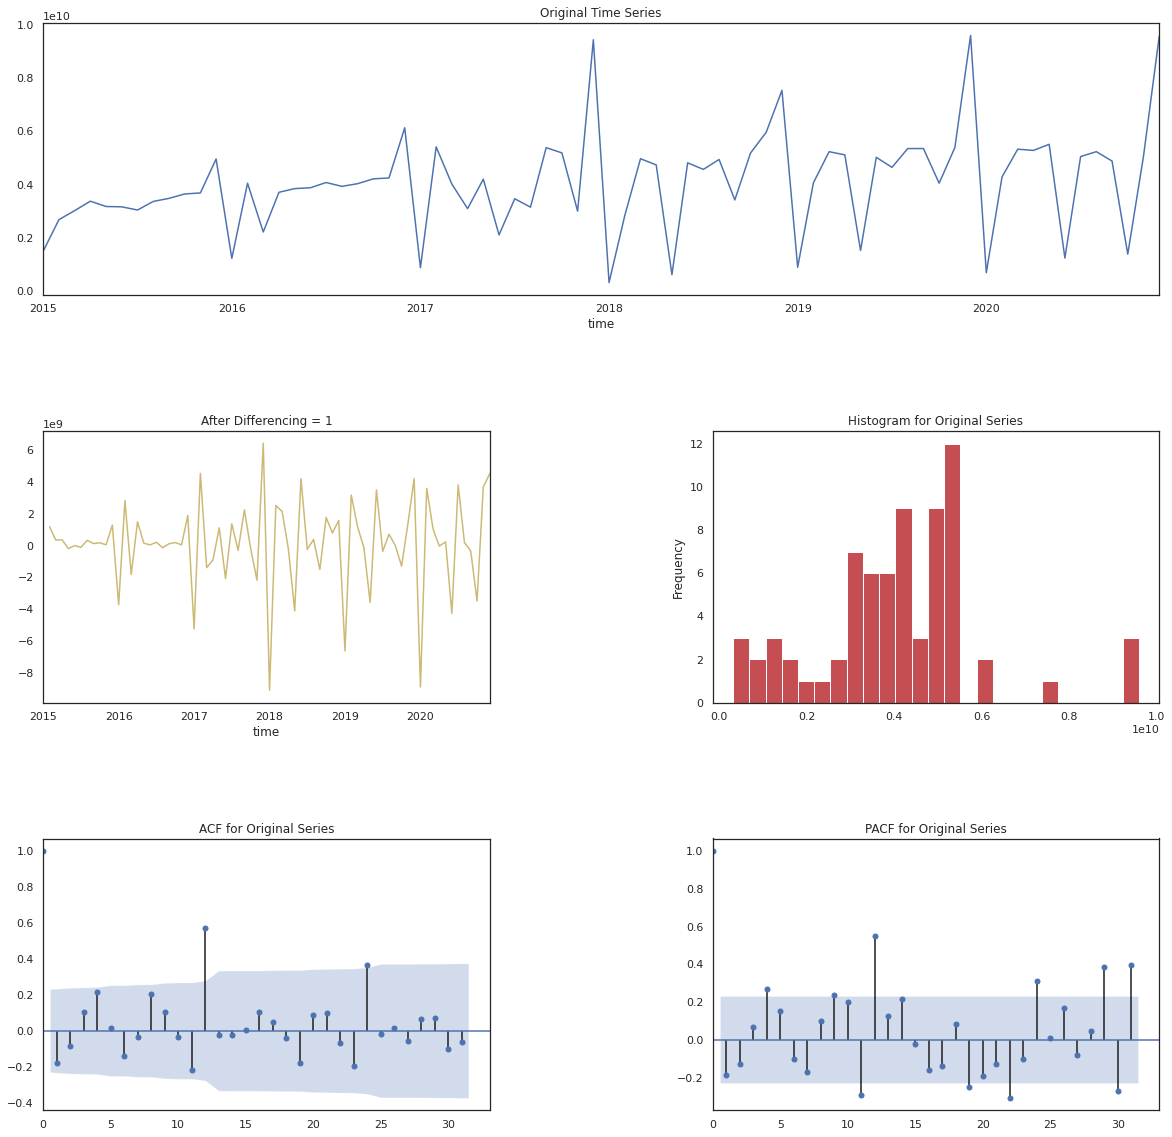

Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
    Fit-Predict data (shape=(72, 2)) with Confidence Interval = 0.95...
  Starting Prophet Fit
       Adding monthly seasonality to Prophet with period=12, fourier_order=12 and prior_scale=0.10
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 47 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 1,680,641,681.60
    Std Deviation of actuals = 2,158,119,577.76
    Normalized RMSE = 78%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 52 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 740,102,645.52
    Std Deviation of actuals = 1,449,981,207.90
    Normalized RMSE = 51%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 57 Test Shape: 5
    Root Mean Squared Error predicti

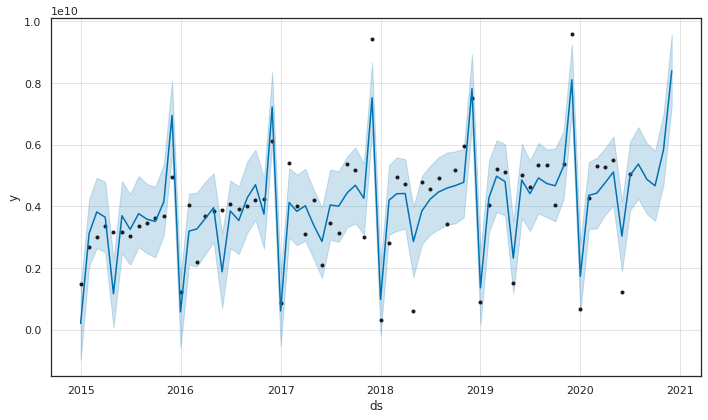

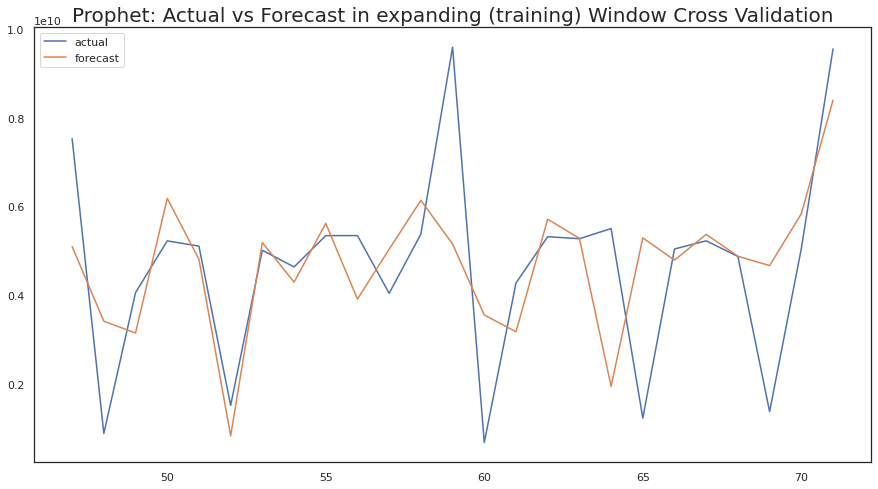

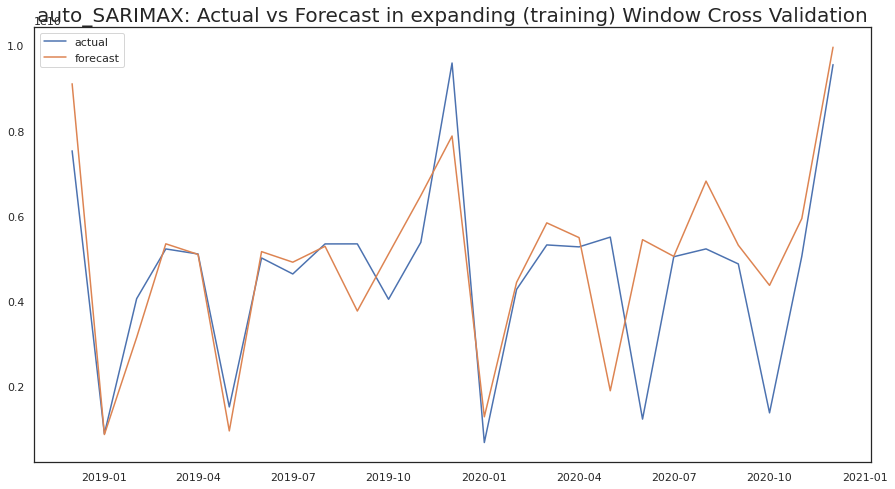

In [12]:
ml_dict.fit(traindata=billing_data, ts_column=ts_column, target=target, cv=5, sep=",")

In [13]:
predictions = ml_dict.predict( testdata = test, model = 'best')

In [14]:
predictions

BilledAmount,yhat,mean_se,mean_ci_lower,mean_ci_upper
2021-01-01,4.160519e+08,1.386514e+09,-2.301465e+09,3.133569e+09
2021-02-01,4.069582e+09,1.456796e+09,1.214314e+09,6.924849e+09
2021-03-01,5.078891e+09,1.463908e+09,2.209684e+09,7.948098e+09
2021-04-01,5.029329e+09,1.464645e+09,2.158677e+09,7.899982e+09
2021-05-01,5.244987e+09,1.464722e+09,2.374184e+09,8.115789e+09
2021-06-01,9.651559e+08,1.464730e+09,-1.905662e+09,3.835974e+09
2021-07-01,4.763256e+09,1.464731e+09,1.892436e+09,7.634076e+09
2021-08-01,4.935802e+09,1.464731e+09,2.064982e+09,7.806622e+09
2021-09-01,4.572346e+09,1.464731e+09,1.701526e+09,7.443166e+09
2021-10-01,1.067078e+09,1.464731e+09,-1.803742e+09,3.937898e+09


In [15]:
ml_dict.predict( testdata = 12, model = 'best')

BilledAmount,yhat,mean_se,mean_ci_lower,mean_ci_upper
2021-01-01,4.160519e+08,1.386514e+09,-2.301465e+09,3.133569e+09
2021-02-01,4.069582e+09,1.456796e+09,1.214314e+09,6.924849e+09
2021-03-01,5.078891e+09,1.463908e+09,2.209684e+09,7.948098e+09
2021-04-01,5.029329e+09,1.464645e+09,2.158677e+09,7.899982e+09
2021-05-01,5.244987e+09,1.464722e+09,2.374184e+09,8.115789e+09
2021-06-01,9.651559e+08,1.464730e+09,-1.905662e+09,3.835974e+09
2021-07-01,4.763256e+09,1.464731e+09,1.892436e+09,7.634076e+09
2021-08-01,4.935802e+09,1.464731e+09,2.064982e+09,7.806622e+09
2021-09-01,4.572346e+09,1.464731e+09,1.701526e+09,7.443166e+09
2021-10-01,1.067078e+09,1.464731e+09,-1.803742e+09,3.937898e+09


In [16]:
billing_pc_data = read_csv('/gdrive/My Drive/AIML/Budget_PC_Billing_Pattern.csv',parse_dates={'time':['Year','Month']},)

In [17]:
billing_pc_data

,time,PC,BilledAmount
0,2015-01-01,15598,1495573889
1,2015-02-01,15598,2677319369
2,2015-03-01,15771,3017270141
3,2015-04-01,15944,3371122481
4,2015-05-01,16092,3171867579
...,...,...,...
67,2020-08-01,20593,5229801635
68,2020-09-01,20753,4877444978
69,2020-10-01,20681,1383242561
70,2020-11-01,20645,5056037033


In [18]:
df_len_pc = len(billing_pc_data)
split_index_pc = int(df_len_pc*0.67)

In [19]:
train_pc = billing_pc_data[:split_index_pc]
test_pc =  billing_pc_data[split_index_pc:]

In [20]:
ts_column_pc = 'time'
target_pc = 'BilledAmount'

In [21]:
ml_dict_pc = AT.auto_timeseries(score_type='rmse',time_interval='M',
                non_seasonal_pdq=None, seasonality=True, seasonal_period=12,
                model_type=['best'],
                verbose=2)

Start of Fit.....
Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Error: Stationary test failed. Data must be np.array. Check your input and try stationary test again
    Target variable given as = BilledAmount
Start of loading of data.....
Input is data frame. Performing Time Series Analysis
ts_column: time sep: , target: BilledAmount
    Loaded pandas dataframe...
    pandas Dataframe loaded successfully. Shape of data set = (48, 2)


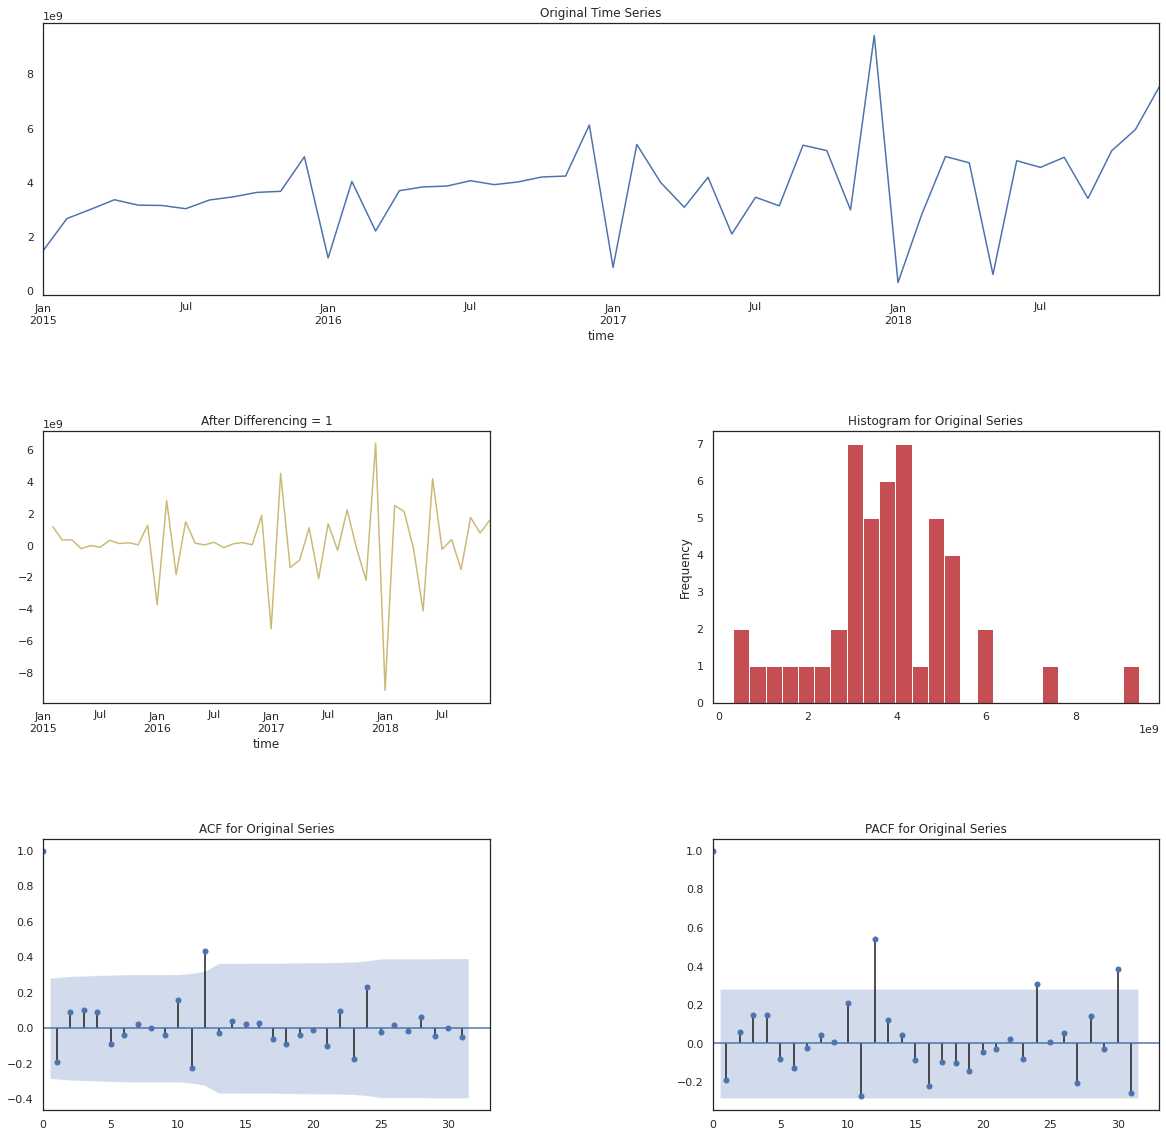

Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
    Fit-Predict data (shape=(48, 3)) with Confidence Interval = 0.95...
  Starting Prophet Fit
       Adding monthly seasonality to Prophet with period=12, fourier_order=12 and prior_scale=0.10
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 23 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 1,928,303,563.20
    Std Deviation of actuals = 1,846,447,517.65
    Normalized RMSE = 104%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 28 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 1,150,637,554.51
    Std Deviation of actuals = 1,092,368,177.08
    Normalized RMSE = 105%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 33 Test Shape: 5
    Root Mean Squared Error pred

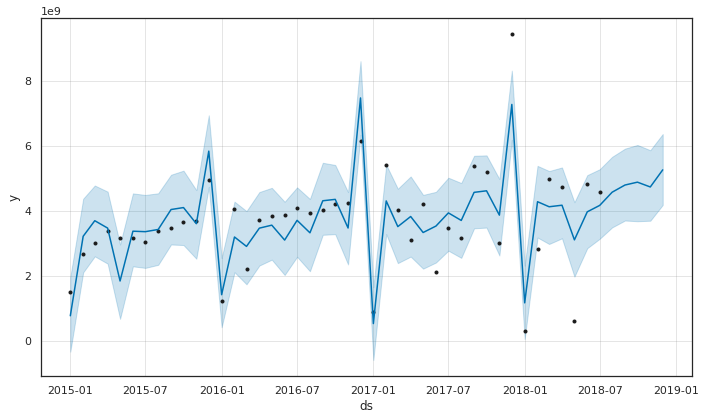

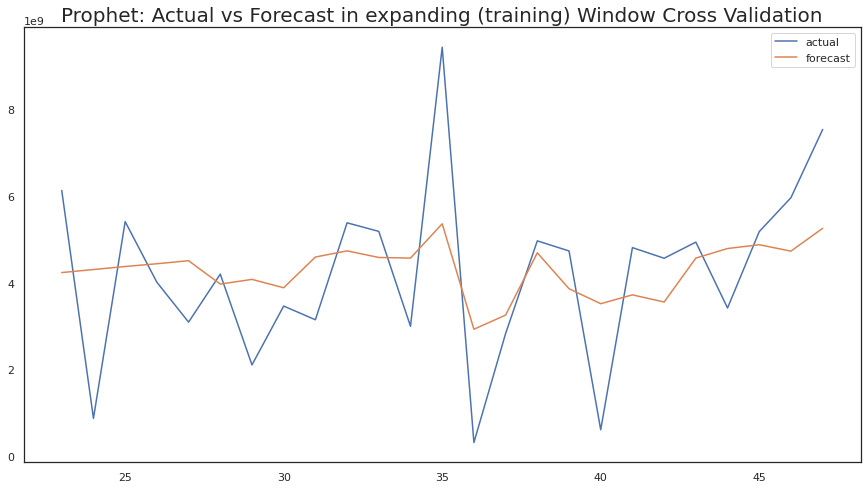

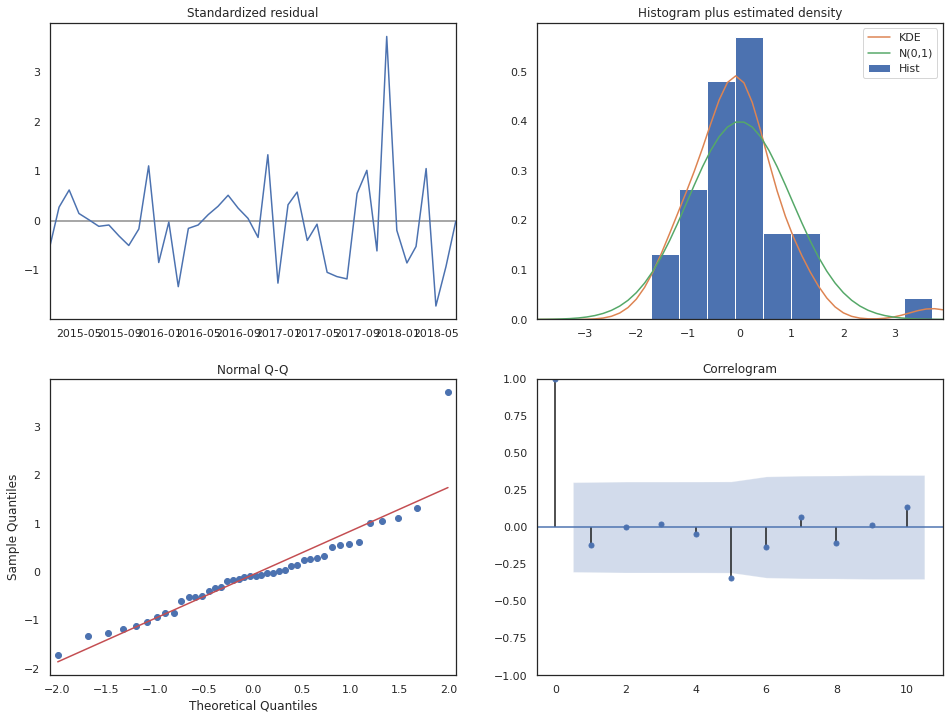

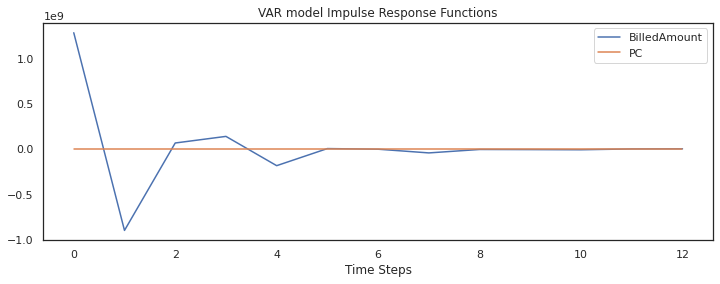

In [22]:
ml_dict_pc.fit(traindata=train_pc, ts_column=ts_column, target=target_pc, cv=5, sep=",")

In [23]:
predictions_pc = ml_dict_pc.predict(testdata = test_pc, model = 'best')

Building Forecast dataframe. Forecast Period = 24


In [24]:
predictions_pc

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,4.404428e+09,7.421390e+08,2.972399e+09,4.404428e+09,4.404428e+09,-2.487398e+09,-2.487398e+09,-2.487398e+09,-2.487398e+09,-2.487398e+09,-2.487398e+09,0.0,0.0,0.0,1.917030e+09
1,2019-02-01,4.430182e+09,3.172946e+09,5.476142e+09,4.430182e+09,4.430182e+09,-8.209092e+07,-8.209092e+07,-8.209092e+07,-8.209092e+07,-8.209092e+07,-8.209092e+07,0.0,0.0,0.0,4.348091e+09
2,2019-03-01,4.453443e+09,3.773336e+09,5.949589e+09,4.453443e+09,4.453443e+09,3.670857e+08,3.670857e+08,3.670857e+08,3.670857e+08,3.670857e+08,3.670857e+08,0.0,0.0,0.0,4.820529e+09
3,2019-04-01,4.479196e+09,3.518772e+09,5.672808e+09,4.479196e+09,4.479196e+09,1.384399e+08,1.384399e+08,1.384399e+08,1.384399e+08,1.384399e+08,1.384399e+08,0.0,0.0,0.0,4.617636e+09
4,2019-05-01,4.504119e+09,1.880946e+09,4.062380e+09,4.504119e+09,4.504119e+09,-1.506780e+09,-1.506780e+09,-1.506780e+09,-1.506780e+09,-1.506780e+09,-1.506780e+09,0.0,0.0,0.0,2.997339e+09
5,2019-06-01,4.529873e+09,3.397233e+09,5.668998e+09,4.529873e+09,4.529873e+09,9.476554e+06,9.476554e+06,9.476554e+06,9.476554e+06,9.476554e+06,9.476554e+06,0.0,0.0,0.0,4.539349e+09
6,2019-07-01,4.554796e+09,3.386898e+09,5.535874e+09,4.554796e+09,4.554796e+09,-4.739386e+07,-4.739386e+07,-4.739386e+07,-4.739386e+07,-4.739386e+07,-4.739386e+07,0.0,0.0,0.0,4.507402e+09
7,2019-08-01,4.580549e+09,3.801407e+09,6.002689e+09,4.580549e+09,4.580549e+09,3.183703e+08,3.183703e+08,3.183703e+08,3.183703e+08,3.183703e+08,3.183703e+08,0.0,0.0,0.0,4.898920e+09
8,2019-09-01,4.606303e+09,3.468241e+09,5.708157e+09,4.606303e+09,4.606303e+09,-2.376039e+07,-2.376039e+07,-2.376039e+07,-2.376039e+07,-2.376039e+07,-2.376039e+07,0.0,0.0,0.0,4.582542e+09
9,2019-10-01,4.631226e+09,4.348893e+09,6.484792e+09,4.631226e+09,4.631226e+09,6.799455e+08,6.799455e+08,6.799455e+08,6.799455e+08,6.799455e+08,6.799455e+08,0.0,0.0,0.0,5.311171e+09


In [25]:
predictions_pc[['ds','yhat']]

,ds,yhat
0,2019-01-01,1.917030e+09
1,2019-02-01,4.348091e+09
2,2019-03-01,4.820529e+09
3,2019-04-01,4.617636e+09
4,2019-05-01,2.997339e+09
5,2019-06-01,4.539349e+09
6,2019-07-01,4.507402e+09
7,2019-08-01,4.898920e+09
8,2019-09-01,4.582542e+09
9,2019-10-01,5.311171e+09


In [34]:
val_pc = pd.DataFrame({'time':['2021-01-01','2021-02-01','2021-03-01'],
                             'PC':[21000,21050,20030],
                             'BilledAmount':[0,0,0]})

In [35]:
val_pc

,time,PC,BilledAmount
0,2021-01-01,21000,0
1,2021-02-01,21050,0
2,2021-03-01,20030,0


In [36]:
predictions_forecast = ml_dict_pc.predict(testdata = val_pc, model = 'best')

Building Forecast dataframe. Forecast Period = 3


In [37]:
predictions_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,5.011714e+09,6.828071e+08,2.896347e+09,5.011714e+09,5.011714e+09,-3.209638e+09,-3.209638e+09,-3.209638e+09,-3.209638e+09,-3.209638e+09,-3.209638e+09,0.0,0.0,0.0,1.802076e+09
1,2021-02-01,5.037468e+09,4.444727e+09,6.667284e+09,5.037467e+09,5.037468e+09,5.220592e+08,5.220592e+08,5.220592e+08,5.220592e+08,5.220592e+08,5.220592e+08,0.0,0.0,0.0,5.559527e+09
2,2021-03-01,5.060729e+09,3.623247e+09,5.847676e+09,5.060729e+09,5.060729e+09,-3.129103e+08,-3.129103e+08,-3.129103e+08,-3.129103e+08,-3.129103e+08,-3.129103e+08,0.0,0.0,0.0,4.747819e+09


In [38]:
predictions_forecast[['ds','yhat']]

,ds,yhat
0,2021-01-01,1.802076e+09
1,2021-02-01,5.559527e+09
2,2021-03-01,4.747819e+09
